<a href="https://colab.research.google.com/github/TanveerAman/LetsGrowMore/blob/main/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshaping the training and testing data 
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [3]:
# normalizing the values of pixels of images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

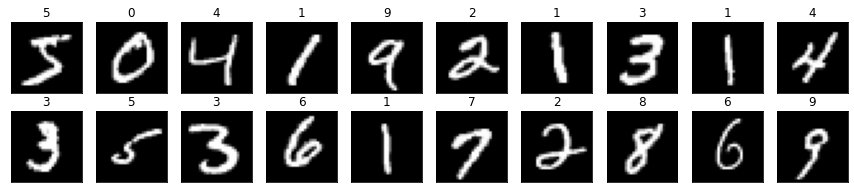

In [4]:
fig = plt.figure(figsize=(15,3))
for i in range(20):
 ax = fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
 ax.imshow(np.squeeze(x_train[i]), cmap='gray')
 ax.set_title(y_train[i])

In [5]:
# determine the shape of the input images
inp_shape = x_train.shape[1:]
print(inp_shape)

(28, 28, 1)


In [6]:
# defining the model
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=inp_shape))

model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Conv2D(48, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(500, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
# text Description of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

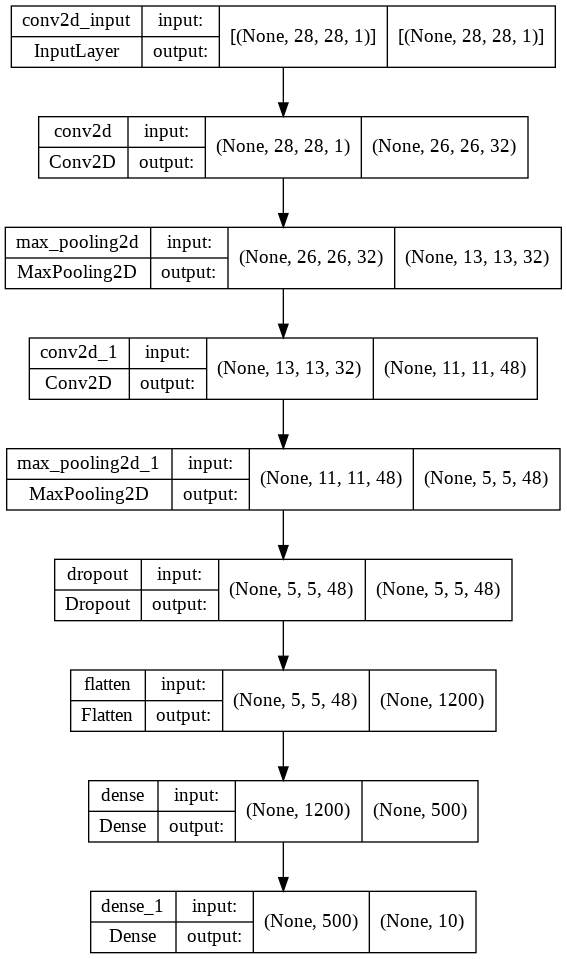

In [8]:
# ploting the model architecture
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

In [9]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 5s - loss: 0.2465 - accuracy: 0.9248 - val_loss: 0.0519 - val_accuracy: 0.9857 - 5s/epoch - 11ms/step
Epoch 2/10
422/422 - 2s - loss: 0.0808 - accuracy: 0.9744 - val_loss: 0.0405 - val_accuracy: 0.9887 - 2s/epoch - 4ms/step
Epoch 3/10
422/422 - 3s - loss: 0.0592 - accuracy: 0.9819 - val_loss: 0.0319 - val_accuracy: 0.9910 - 3s/epoch - 6ms/step
Epoch 4/10
422/422 - 3s - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0354 - val_accuracy: 0.9902 - 3s/epoch - 6ms/step
Epoch 5/10
422/422 - 3s - loss: 0.0405 - accuracy: 0.9868 - val_loss: 0.0270 - val_accuracy: 0.9927 - 3s/epoch - 6ms/step
Epoch 6/10
422/422 - 3s - loss: 0.0349 - accuracy: 0.9888 - val_loss: 0.0285 - val_accuracy: 0.9917 - 3s/epoch - 6ms/step
Epoch 7/10
422/422 - 2s - loss: 0.0316 - accuracy: 0.9901 - val_loss: 0.0248 - val_accuracy: 0.9928 - 2s/epoch - 6ms/step
Epoch 8/10
422/422 - 2s - loss: 0.0299 - accuracy: 0.9901 - val_loss: 0.0249 - val_accuracy: 0.9930 - 2s/epoch - 5ms/step
Epoch 9/10
422/422 - 2s

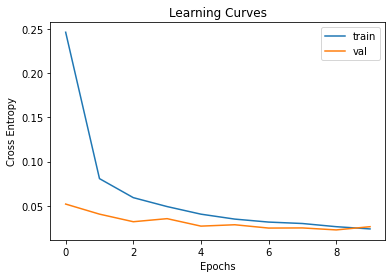

In [10]:
# ploting the learning curves
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

In [11]:
# evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.30999875068665


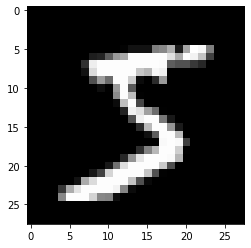

In [12]:
image = x_train[0]
# lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')

In [13]:
# make a prediction
image= image.reshape(image.shape[0],image.shape[1],image.shape[2],1)

# predicting the label of image
yhat = model.predict([image])
print('Predicted: {}'.format(np.argmax(yhat)))

Predicted: 5
